# <center>MDSA D207 Exploratory Data Analysis</center> 



## <center>WGU</center>




### A.  Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

1.  Provide one question that is relevant to your chosen data set.
 
    - What factors, if any, can be used to predict a customers churn?

        - Null hypothesis(H0) - Churn rate for TechSupport and No TechSupport has no significant association
        - Alternative hypothesis(H1) - Churn rate for TechSupport and No TechSupport has significant association
    

2.  Explain how stakeholders in the organization could benefit from an analysis of the data.

    - This analysis will help identify any factors that contribute to customer churn.  By identifying factors that contribute to churn, the company can address these factors to reduce churn rate. Since it costs 10 times more to acquire a new customer than to retain an existing one, it could greatly reduce cost the company spends on marketing new customers.  Lowering the annual churn rate could also lead to higher profits for the company.     
      

3.  Identify all of the data in your data set that are relevant to answering your question in part A1.

    - Churn (Categorical/Ordinal) if a customer has discontinued service within the last month  (yes, no)
    - TechSupport (Categorical/Ordinal) if a customer has technical support add-on (yes, no)




### B.  Describe the data analysis by doing the following:

1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:

    •   chi-square

    •   t-test

    •   ANOVA
    
2.  Provide the output and the results of any calculations from the analysis you performed.

Below is the code and ouput for B1 & B2.  A chi-square test will be used. 


In [1]:
# package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2

In [2]:
# code for data frame
churn = pd.read_csv("C:/users/jjord/Documents/WGU/D207/PA/churn_clean.csv")

In [3]:
# Profile of Data Frame
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Missing values using isnull
churn.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [5]:
# look at unique values for InternetService
churn.InternetService.unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

In [6]:
# Impute nulls for InternetService
churn["InternetService"].fillna("No Internet Service", inplace=True)

In [7]:
# verify InternetService no longer has nulls
churn["InternetService"].isnull().sum()

0

Columns Zip, Lat, Lng currently are floats or ints.  There are not quantitative so will change datatype to object.  These values are not meant for any type of calculation.  Since the rest of the data types for categorical are set to object, these will aslo.

In [8]:
obj_columns = ["Zip", "Lat", "Lng"]
churn[obj_columns] = churn[obj_columns].astype(object)

In [9]:
# rename item columns
churn.rename(
    columns={
        "Item1": "Timely_response",
        "Item2": "Timely_fixes",
        "Item3": "Timely_replacements",
        "Item4": "Reliability",
        "Item5": "Options",
        "Item6": "Respectful_response",
        "Item7": "Courteous_exchange",
        "Item8": "Active_listening",
    },
    inplace=True,
)

In [10]:
# Profile of Data Frame after additional cleaning
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  object 
 8   Lat                   10000 non-null  object 
 9   Lng                   10000 non-null  object 
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [11]:
# contingency table creation for columns Churn and TechSupport
ct = pd.crosstab(
    churn["Churn"], churn["TechSupport"], margins=True, margins_name="Totals"
)
print(ct)

TechSupport    No   Yes  Totals
Churn                          
No           4634  2716    7350
Yes          1616  1034    2650
Totals       6250  3750   10000


In [12]:
# chi-square test with chi2_contingency (WGU,2024)
chi_results = stats.chi2_contingency(ct)
print(chi_results)

Chi2ContingencyResult(statistic=3.5488469601677153, pvalue=0.4704900304752636, dof=4, expected_freq=array([[ 4593.75,  2756.25,  7350.  ],
       [ 1656.25,   993.75,  2650.  ],
       [ 6250.  ,  3750.  , 10000.  ]]))


In [13]:
# results from above
# statistic = 3.5488469601677153
# pvalue = 0.4704900304752636
# dof = 4
# expected_freq = ([[ 4593.75,  2756.25,  7350.  ],[ 1656.25,   993.75,  2650.  ],[ 6250.  ,  3750.  , 10000.  ]]))

pvalue = 0.4704900304752636
# interpretation of results based on pvalue and an alpha of 5%
alpha = 0.05
if pvalue < alpha:
    print(
        "Churn rate for TechSupport and No TechSupport has no significant association.  REJECTED"
    )
else:
    print(
        "Churn rate for TechSupport and No TechSupport has significant association.  NOT REJECTED"
    )

Churn rate for TechSupport and No TechSupport has significant association.  NOT REJECTED


### B. Continued
3.  Justify why you chose this analysis technique.
    - The analysis is using the categorical variables Churn and TechSupport.  A chi-squared test was used because it determines if an assocation exists between two categorical vairables(WGU, 2024).  A t-test was not used becuase it compares means of continuous variables.    An ANOVA test was not used becuase it also compares means of continuous variables.  Since we are using categorical variables and we needed to see if any association existed between them, a chi-squared test was the most suitable option. 



### C.  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

Represent your findings in Part C, visually as part of your submission.

#### Continuous Variables
-  Bandwidth_GB_Year
-  Outage_sec_perweek

#### Categorical Variables
- InternetService
- Contract
 


c:\Users\jjord\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jjord\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


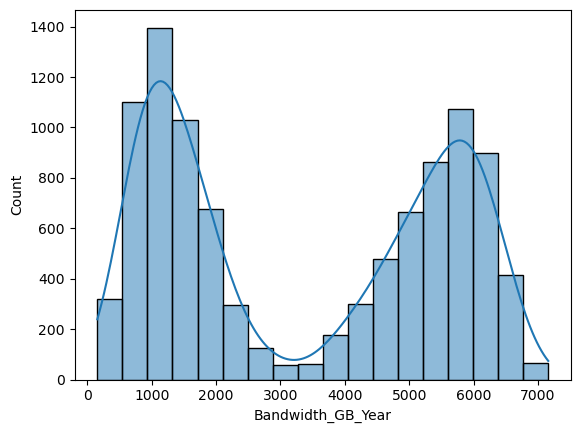

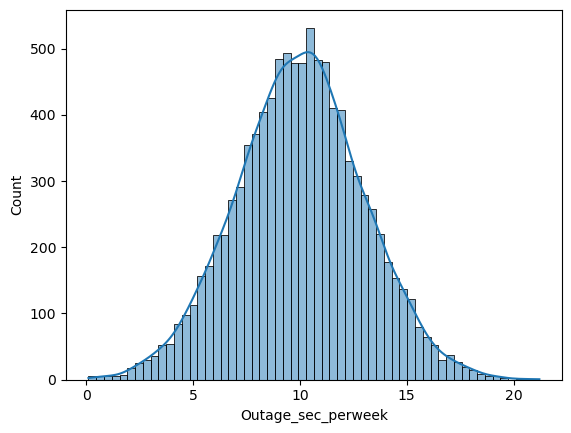

In [14]:
# list creation for continuous variables
cont_var = ["Bandwidth_GB_Year", "Outage_sec_perweek"]
# continuous variable visualizations
for n, col in enumerate(churn[cont_var]):
    try:
        plt.figure(n)
        sns.histplot(churn[col][churn[col] > 0], kde=True)
    except Exception:
        pass

Text(0.5, 1.0, 'Contract')

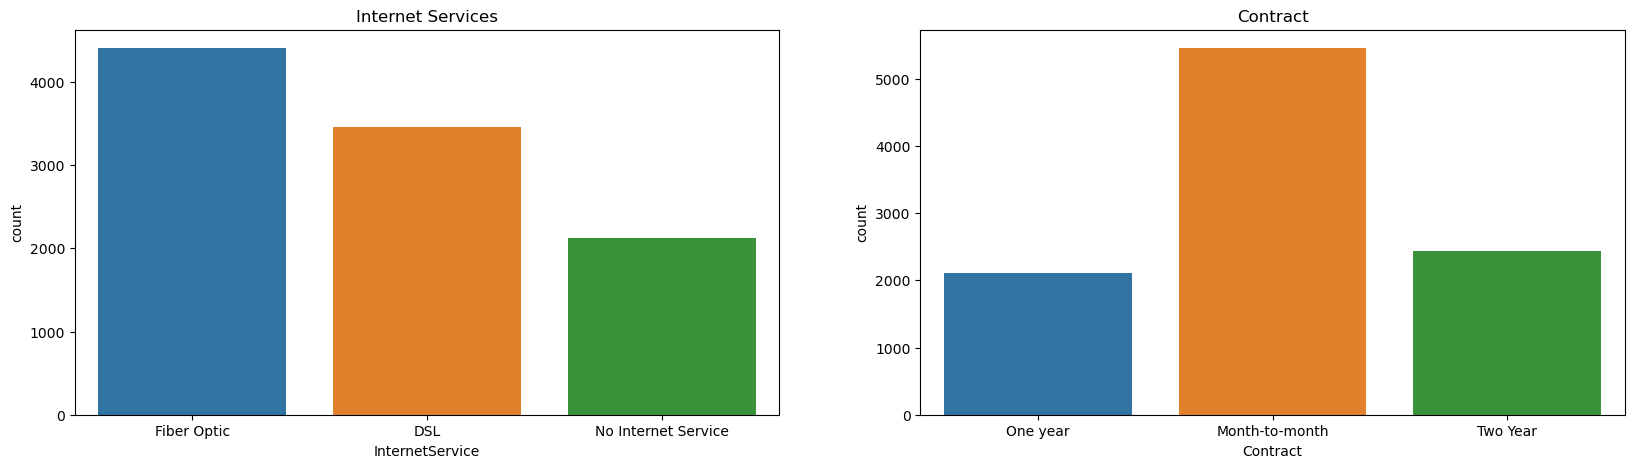

In [15]:
# categorical variable visualizations
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(data=churn, x="InternetService", ax=axes[0])
axes[0].set_title("Internet Services")
sns.countplot(data=churn, x="Contract", ax=axes[1])
axes[1].set_title("Contract")

In [16]:
# descriptive stats Bandwidth_GB_Year
churn.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [17]:
# descriptive stats Outage_sec_perweek
churn.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [18]:
# descriptive stats InternetService
churn.InternetService.value_counts()

InternetService
Fiber Optic            4408
DSL                    3463
No Internet Service    2129
Name: count, dtype: int64

In [19]:
# descriptive stats Contract
churn.Contract.value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

Bandwidth_GB_Year has a distribution that is bimodal and Outage_sec_perweek has a normal distribution.  InternetService shows Fiber Optic as the most popular choice followed by DSL and No Internet Service respectively.  Contract shows the Month-to-month option being far more popular than Two Year and One year respectively.   

### D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

Represent your findings in Part D, visually as part of your submission.

#### Continuous Variables
-  Children
-  MonthlyCharge

#### Categorical Variables
- Churn
- Gender
 




<Axes: xlabel='Children', ylabel='MonthlyCharge'>

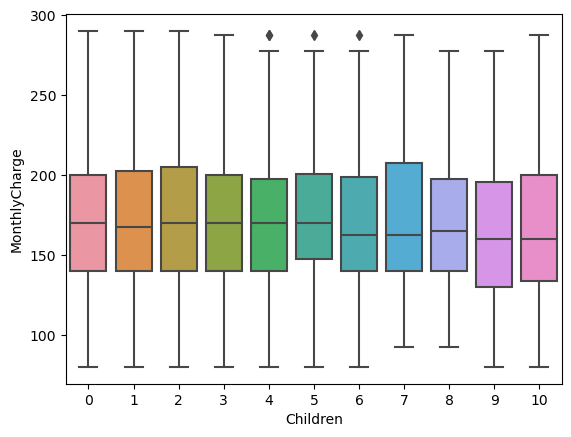

In [20]:
# bivariate stats continuous variables
sns.boxplot(x="Children", y="MonthlyCharge", data=churn)

In [21]:
# correlation between monthlycharge and children
churn[["MonthlyCharge", "Children"]].corr()

,MonthlyCharge,Children
MonthlyCharge,1.000000,-0.009781
Children,-0.009781,1.000000


<Axes: xlabel='Churn', ylabel='count'>

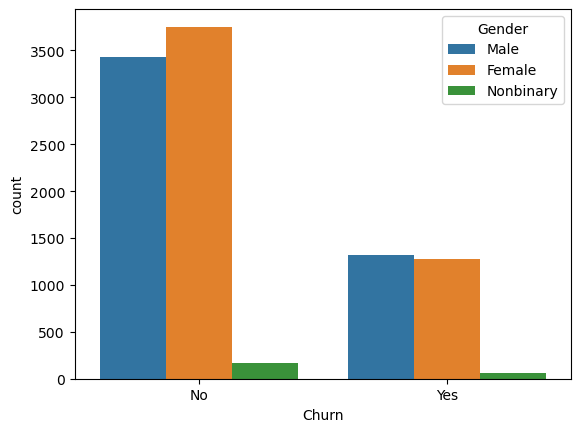

In [22]:
# bivariate stats categorical variables
sns.countplot(x="Churn", hue="Gender", data=churn)

In [23]:
# correlation between churn and gender
bv = pd.crosstab(churn["Churn"], churn["Gender"], margins=True)
print(bv)

Gender  Female  Male  Nonbinary    All
Churn                                 
No        3753  3425        172   7350
Yes       1272  1319         59   2650
All       5025  4744        231  10000


### E.  Summarize the implications of your data analysis by doing the following:

1.  Discuss the results of the hypothesis test.
    
    -  The alpha for the chi-square test is set to 0.05  The analysis shows a p-value of 0.47049 is greater than the alpha and fails to reject the null hypothesis.  At this time, a conclusion cannot be made that there is a correlation between the variables used. 

        - Null hypothesis(H0) - Churn rate for TechSupport and No TechSupport has no significant association
        - Alternative hypothesis(H1) - Churn rate for TechSupport and No TechSupport has significant association


In [24]:
# copy of code from section B to show what is discussed above
pvalue = 0.4704900304752636
# interpretation of results based on pvalue and an alpha of 5%
alpha = 0.05
if pvalue < alpha:
    print(
        "Churn rate for TechSupport and No TechSupport has no significant association.  REJECTED"
    )
else:
    print(
        "Churn rate for TechSupport and No TechSupport has significant association.  NOT REJECTED"
    )

Churn rate for TechSupport and No TechSupport has significant association.  NOT REJECTED


#### E.(continued)
2.  Discuss the limitations of your data analysis.

    - The analysis is using the categorical variables Churn and TechSupport.  A chi-squared test was used because it determines if an assocation exists between two categorical vairables(WGU, 2024).  A t-test was not used becuase it compares means of continuous variables.    An ANOVA test was not used becuase it also compares means of continuous variables.  Since we are using categorical variables and we needed to see if any association existed between them, a chi-squared test was the most suitable option as the other two require the use of numerical variables. 

    - Another limitation of the analysis is that only two variables were used.  In order to get a better understanding of customer Churn, it would be ideal to consider the addition of other variables for analysis.  Trying to get insight into churn rate on only two variables is not ideal as there are other factors that contribute to churn.    

3.  Recommend a course of action based on your results.

    - The analysis showed to not reject the null hypothesis and that there was no correlation between the variables.  Even though the null was not rejected, further analysis should be done.  It is recommended that other variables to be added to the analysis and other test be explored as well.  It would also be wise to commend the techincal support team for a job well done as there actions do not influence a customer's churn according to this analysis.   

### F.  Panopto Link



 

### G.  Reference the web sources used to acquire segments of third-party code to support the analysis. 
    WGU (n.d.). A Guide to Conduc􀆟ng Chi-Square Test for Two Categorical Variables using Python. Retrieved March 24, 2024, from
    https://srm--c.vf.force.com/apex/CourseArticle?id=kA03x0000015vjWCAQ
 

### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
    WGU (n.d.). A Guide to Conduc􀆟ng Chi-Square Test for Two Categorical Variables using Python. Retrieved March 24, 2024, from
    https://srm--c.vf.force.com/apex/CourseArticle?id=kA03x0000015vjWCAQ